# 🌐 **Day 14: OAuth 2.0 (Flow + Security)**

---

## 🔐 What is OAuth 2.0?

OAuth 2.0 is an **authorization framework**, not an authentication protocol.

👉 It lets third-party apps (like your app) request access to a user’s data *without* needing their password.

### 🔁 Analogy:

Imagine:

- You're at a hotel (the app) and you want to access the gym (user's data in a secure service like Google).
- The hotel receptionist (OAuth server) gives you a **key card** (access token) that only works for the gym, *not your room* (scoped access).

You never get the master key (user’s actual password).

---

## 🔄 OAuth 2.0 Flow

1. **Client app** (you) wants data → redirects user to **Auth Server**
    - Sends: `client_id`, `redirect_uri`, `scope`, and `response_type=code`

2. **User logs in** and grants permission.

3. Auth Server redirects to your `redirect_uri` with a **temporary `code`**.

4. Your app exchanges `code` + `client_secret` for an **Access Token** (and optionally a Refresh Token).

5. Use the Access Token in headers:

```
http
Authorization: Bearer <access_token>

```

- YouTube - [OAuth 2.0: An Overview](https://www.youtube.com/watch?v=CPbvxxslDTU)

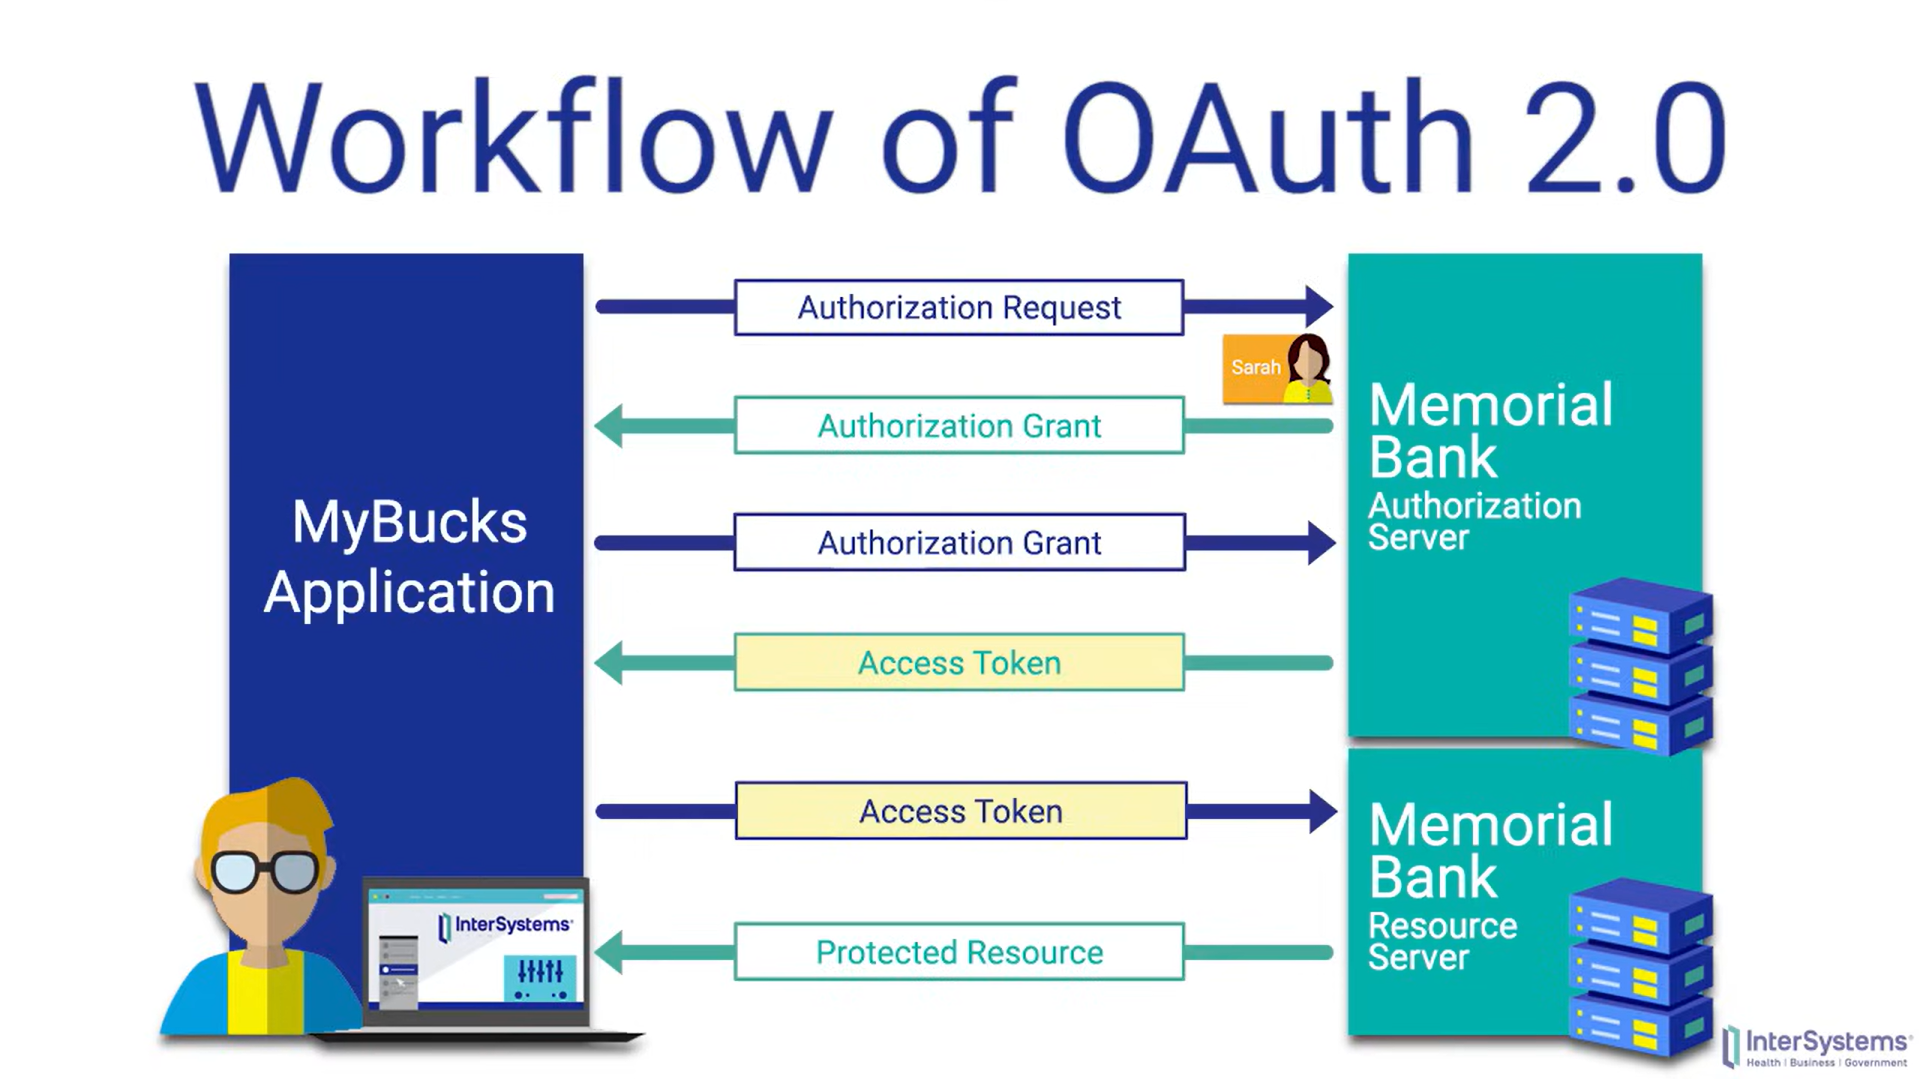

---

## 🔑 OAuth 2.0 Grant Types (Flows)

Each "grant type" represents a different way for a client (app) to obtain an access token. The type used depends on the kind of app and the trust level.

### 1. **Authorization Code Grant (Most Common)**

**Use Case**: Secure web or mobile apps (with backend)

**Steps**:

- App redirects user to auth server.
- User logs in and consents.
- Auth server redirects back with a **code**.
- App exchanges code + client secret for token.

**🔍 Why?** Code is exchanged on backend → safer than exposing tokens directly in frontend.

**🧳 Analogy**: Like going to an embassy, getting a visa approval letter, and then redeeming that letter for a visa (token) at the embassy counter.


### 2. **Implicit Grant (Deprecated/Not Recommended)**

**Use Case**: Single-page apps (historically)

**How it works**:

- Token returned directly in the redirect URI.
- **No server-side code**.

**⚠️ Why Not?** Tokens exposed in browser URL → insecure.

**📢 Note**: Replaced with **Authorization Code + PKCE** for frontend apps.


### 3. **Resource Owner Password Credentials Grant (ROPC)**

**Use Case**: Trusted apps (e.g., official mobile app)

**How it works**:

- User provides **username + password** directly to the app.
- App sends credentials to auth server → gets token.

**⚠️ Risky**: App sees user credentials; avoid unless fully trusted (e.g., 1st-party app).

**🏠 Analogy**: Giving your house keys to a trusted friend, rather than asking your landlord (auth server) to create a temporary one.


### 4. **Client Credentials Grant**

**Use Case**: Machine-to-machine apps (no user involved)

**How it works**:

- App sends `client_id + client_secret` to token endpoint.
- Gets access token to access *its own data* (not a user's).

**🤖 Example**: A server fetching analytics or doing scheduled tasks.

**🔧 Analogy**: Like a bot asking for a building pass to run diagnostics — no user context is needed.


### 5. **Device Authorization Grant (Device Flow)**

**Use Case**: Devices without browsers (e.g., TVs)

**How it works**:

- Device shows a code.
- User logs in on phone and enters code.
- Token issued to device after user confirms.

**📺 Analogy**: When Netflix on TV asks you to “visit netflix.com/activate” on your phone and enter a code.


### 6. **Refresh Token Grant**

**Use Case**: Token expired but app still trusted

**How it works**:

- App uses a **refresh token** (long-lived) to get a new access token (short-lived).
- No user involvement needed again.

**⏳ Analogy**: Like renewing your session with a gym key card that auto-renews without visiting the front desk.

---

## 🔑 Key Terms

| Term | Meaning |
| --- | --- |
| **Client ID** | Unique ID given to your app when registered on the auth server |
| **Client Secret** | Secret key (like a password) used to authenticate your app |
| **Redirect URI** | Where the user is sent back after login |
| **Access Token** | Short-lived token to access protected resources |
| **Refresh Token** | Long-lived token to get new access tokens without login again |
| **Scope** | What kind of access is being requested |
| **Bearer** | Keyword in HTTP header that tells server "I'm sending a token" |
| **PKCE** (Proof Key for Code Exchange) | Adds security to authorization code flow in mobile apps (mitigates interception) |
| **State** param | Prevents CSRF. Random string sent and verified between requests |
| **Scope** | Defines what permissions are requested. Example: `email`, `profile` |
| **Token Endpoint** | Where you exchange code or credentials for access/refresh tokens |
| **Authorization Endpoint** | Where user logs in and consents |
| **JWT (JSON Web Token)** | Often used for tokens. Self-contained with user data inside |
| **Revocation Endpoint** | Where access or refresh tokens can be invalidated |

* CSRF - Cross-Site Request Forgery (CSRF) is a web security vulnerability where an attacker tricks a user's browser into performing unwanted actions on a website where the user is authenticated
* [URI knowledge](https://www.geeksforgeeks.org/computer-networks/uri-full-form/)

## ⚠️ Security Concepts

| Risk | Mitigation |
| --- | --- |
| **Token Leakage** | Use HTTPS, short-lived tokens, store tokens securely |
| **Scope Misuse** | Always request *minimal* permissions |
| **Stolen Refresh Token** | Can be abused long-term. Store in secure backend, not frontend |
| **CSRF Attacks on Redirect URI** | Use state parameters and validate `state` after redirect |

## 🔐 Security Recap with Analogies

| Security Concept | Meaning | Analogy |
| --- | --- | --- |
| **Access Token** | Short-lived, used to access resources | Your gym key card |
| **Refresh Token** | Used to get a new access token | Renewal slip to extend gym access |
| **Scope** | Defines *what* the token can access | Gym card that only lets you in the cardio room |
| **State** | Protects against CSRF | Matching your ID at the gate to your face |
| **Redirect URI** | Where to send user after login | The door of the gym takes you out through |
| **Client ID** | App’s public identifier | Your car’s license plate |
| **Client Secret** | App’s password | Your car’s ignition key (don’t share it!) |


## 💡 Real-World Scenarios

| App Type | Grant Type | Reason |
| --- | --- | --- |
| Gmail on browser | Authorization Code | User logs in, redirects, backend-safe |
| Internal service | Client Credentials | No user context |
| IoT device | Device Code Grant | No screen/browser |
| Old mobile app | ROPC (not recommended now) | Trusted app but now deprecated |
| SPAs | Authorization Code + PKCE | Safe and modern |


---

Accessing a user’s **GitHub profile info** via OAuth 2.0

> You’ll need a client ID and secret from GitHub for real testing, but for now, just observe the syntax.

In [5]:
try:    
    from requests_oauthlib import OAuth2Session
    from oauthlib.oauth2 import BackendApplicationClient

    # -----------------------------
    # 1. Set up credentials (You get these from your OAuth provider)
    # -----------------------------
    client_id = 'YOUR_CLIENT_ID'
    client_secret = 'YOUR_CLIENT_SECRET'
    authorization_base_url = 'https://github.com/login/oauth/authorize'
    token_url = 'https://github.com/login/oauth/access_token'
    redirect_uri = 'http://localhost:8000/callback'  # where user will be redirected after login

    # -----------------------------
    # 2. Step 1: Redirect user to GitHub login
    # -----------------------------
    github = OAuth2Session(client_id, redirect_uri=redirect_uri)
    authorization_url, state = github.authorization_url(authorization_base_url)

    print("Go to the following URL and authorize:")
    print(authorization_url)

    # -----------------------------
    # 3. Step 2: After user logs in, they are redirected to redirect_uri with ?code=XXXX
    # -----------------------------
    redirect_response = input("Paste the full redirect URL here: ")

    # -----------------------------
    # 4. Step 3: Exchange code for access token
    # -----------------------------
    token = github.fetch_token(
        token_url,
        client_secret=client_secret,
        authorization_response=redirect_response
    )

    print("Access token:")
    print(token)

    # -----------------------------
    # 5. Step 4: Make an authenticated API call
    # -----------------------------
    response = github.get('https://api.github.com/user')
    print(response.json())

except Exception as e:
    print(f"An error occurred: {e}")
except ImportError:
    print("Please install the required libraries: requests_oauthlib and oauthlib")

Go to the following URL and authorize:
https://github.com/login/oauth/authorize?response_type=code&client_id=YOUR_CLIENT_ID&redirect_uri=http%3A%2F%2Flocalhost%3A8000%2Fcallback&state=hSDVZSjju9Qd8z69Emwvd9wM7sxjO5
An error occurred: Please supply either code or authorization_response parameters.


### 🔁 Explanation of OAuth Fields in Code

| Variable | What You Get / Set | Where it Comes From |
| --- | --- | --- |
| `client_id` | Public app identifier | Provided by GitHub after registration |
| `client_secret` | Private app password | Provided by GitHub after registration |
| `authorization_base_url` | Auth page to redirect users | Always `https://github.com/login/oauth/authorize` for GitHub |
| `token_url` | To exchange code for token | Always `https://github.com/login/oauth/access_token` |
| `redirect_uri` | Where GitHub redirects after login | Must match the one you register in the GitHub developer portal |

---

## 📝 Summary

- OAuth 2.0 = authorization without sharing passwords.
- It uses temporary and refreshable tokens to access data safely.
- The flow includes redirecting, exchanging codes, and requesting scoped access.
- Always secure tokens and understand what each parameter does.

### ✅ 1. Summary Table: OAuth 2.0 Grant Types

| **Grant Type** | **Used When** | **Client Type** | **Security Level** | **Refresh Token?** | **Still Used?** |
| --- | --- | --- | --- | --- | --- |
| **Authorization Code** | User logs in via third-party UI (e.g., Google, GitHub) | Web apps, SPA | 🔒 High | ✅ Yes | ✅ Standard |
| **Client Credentials** | No user involved, backend-to-backend services | Trusted server apps | 🔒 High | ❌ No | ✅ Yes |
| **Password Grant** | User gives username & password to the app directly | Highly trusted apps | ⚠️ Low | ✅ Yes | ❌ Deprecated |
| **Implicit Grant** | For apps that can’t keep secrets (e.g., JS SPAs) — returns token in URL | Browser JS apps | ⚠️ Very Low | ❌ No | ❌ Deprecated |
| **Device Authorization** | For devices with limited input (TVs, consoles) | Device apps | 🔒 Medium | ✅ Yes | ✅ Yes |
| **Refresh Token** *(addon)* | Used to obtain new access tokens without re-authenticating | All | 🔒 High | N/A | ✅ Yes |

---

### ✅ 2. Compact Flow Diagram of Authorization Code Grant

```text
+-------------+        +-------------------+        +----------------+
|   User's    | -----> | Authorization URL | -----> |  Login Prompt  |
|    App      |        | (e.g., GitHub)    |        |  (OAuth Server)|
+-------------+        +-------------------+        +----------------+
       |                        |                           |
       |                        |  Redirect w/ Code         |
       | <--------------------- + <-----------------------+ |
       |                        |
       | Exchange code for token|
       |----------------------->|
       |  (POST to token URL)   |
       |                        |
       |     Access Token       |
       |<----------------------+|

```

---

### ✅ 3. Simple Analogy: “OAuth as Hotel Key”

- **User** = Guest
- **OAuth Provider (e.g., Google)** = Hotel front desk
- **Authorization Code** = Booking receipt
- **Access Token** = Your room key
- **Refresh Token** = Extra key to re-enter after expiry
- **Scope** = Access level (e.g., “Gym + Room” vs “Room Only”)
- **Client App** = Friend picking up key from front desk

> The hotel never gives the real password (your Google credentials) to your friend. It just gives a keycard (access token) if you say it’s okay.
>